# WeatherPy
----

### Observations and Insights
1. From the graph of max temp and latitude, we can see that there is a strong relationship (r = -0.87271) between northern hemisphere latitude and max temp. The max temp will likely decrease 1 F degree per degree latitude in the northern hemisphere.

2. From the cloudiness graph, there is no significant correlation between cloudiness and latitude. Most cities have either higher (close to 100%) cloud covered or lower (close to 0%).

3. There is no strong relationship between wind speed and latitude too. Most cities have a wind speed lower than 20 mph all over the world.

4. We can see the most cities have higher humidity as shown below. This script got the random latitudes and longtitudes between (-90 to 90) and (-180 to 180). However, the **main defect** of this theoretical assumption is that **most area on the earth is covered by ocean where has much fewer cities than the continents**. ``citipy`` only get the closest city of the random coordinates. When it comes to the ocean coordinates, all cities along the coastline would be collected into the dataframe. Those cities are highly humid **due to the ocean currents**, resulting in the relatively higher humidity scatter points in this dataset. *A world map of all analyzed cities is shown in the notebook and readme file to prove this analysis*. 

5. A correlation matrix was generated. Most columns have not strong relationship with each other. However, the Max temp shows a correlated relationship with Latitude (r = -0.67468).

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

# Import API key
from Resources.api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

588

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Define a function to split city list into chunks
def chunks(lst, n):
    # Yield n-sized chunks from list
    for i in range(0, len(lst), n):
        yield lst[i : i + n]

In [4]:
# Split city list into multiple sets with 50 cities in one set
# Set up required url parameters
city_sets = list(chunks(cities, 50))
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Create list for all required info
city_data = []

# Start the request loop
print("Beginning Data Retrieval\n-----------------------------")

# Loop the city sets first
for i, sets in enumerate(city_sets):

    # Loop the cities in each set
    for j, city in enumerate(sets):
        final_url = query_url + city
        response = requests.get(final_url).json()
        print(f"Processing Record {j + 1} of Set {i + 1} | {city}")

        # Try to request the city in case it's not in the database
        try:
            cloudiness = response["clouds"]["all"]
            country = response["sys"]["country"]
            dt = response["dt"]
            humidity = response["main"]["humidity"]
            lat = response["coord"]["lat"]
            lng = response["coord"]["lon"]
            max_temp = response["main"]["temp_max"]
            wind_speed = response["wind"]["speed"]

            city_data.append({
                "City":         city,
                "Cloudiness":   cloudiness,
                "Country":      country,
                "Date":         dt,
                "Humidity":     humidity,
                "Lat":          lat,
                "Lng":          lng,
                "Max Temp":     max_temp,
                "Wind Speed":   wind_speed
            })

        except:
            # If the city is not found, skip it
            print("City not found. Skipping...")
            pass

    # Pause every 50 cities to lower the API request frequency
    print("Pausing for 3s to avoid frequent request...")
    time.sleep(3)

# End of the request loop
print("-----------------------------\n\
Data Retrieval Complete\n\
-----------------------------")


 Set 3 | presidencia roque saenz pena
Processing Record 39 of Set 3 | puerto ayora
Processing Record 40 of Set 3 | saint george
Processing Record 41 of Set 3 | arki
Processing Record 42 of Set 3 | alofi
Processing Record 43 of Set 3 | sobolevo
Processing Record 44 of Set 3 | sawai madhopur
Processing Record 45 of Set 3 | warrnambool
Processing Record 46 of Set 3 | wote
Processing Record 47 of Set 3 | camacha
Processing Record 48 of Set 3 | birao
Processing Record 49 of Set 3 | kintampo
Processing Record 50 of Set 3 | paamiut
Pausing for 3s to avoid frequent request...
Processing Record 1 of Set 4 | touho
Processing Record 2 of Set 4 | praia
Processing Record 3 of Set 4 | talnakh
Processing Record 4 of Set 4 | buraydah
Processing Record 5 of Set 4 | nikolskoye
Processing Record 6 of Set 4 | gat
Processing Record 7 of Set 4 | nova odesa
Processing Record 8 of Set 4 | ust-maya
Processing Record 9 of Set 4 | haines junction
Processing Record 10 of Set 4 | atherton
Processing Record 11 of S

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Parse the dict of city data into a df, export a csv
city_data_df = pd.DataFrame(city_data)
city_data_df.to_csv("city_data.csv")
city_data_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,537.000000,5.370000e+02,537.000000,537.000000,537.000000,537.000000,537.000000
mean,49.404097,1.604806e+09,72.875233,19.679739,15.514004,58.395754,8.361397
std,39.445346,1.947212e+02,19.990513,34.006025,91.056306,22.469943,6.072900
min,0.000000,1.604806e+09,7.000000,-54.800000,-179.170000,-23.060000,0.380000
25%,2.000000,1.604806e+09,62.000000,-8.620000,-63.000000,44.010000,3.710000
50%,51.000000,1.604806e+09,78.000000,24.020000,20.970000,62.600000,6.930000
75%,90.000000,1.604806e+09,87.000000,48.370000,90.500000,76.510000,11.410000
max,100.000000,1.604806e+09,100.000000,78.220000,178.420000,96.800000,39.390000


In [6]:
# Display df
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,albany,75,US,1604805894,93,42.60,-73.97,53.01,3.20
1,jamestown,1,US,1604805885,58,42.10,-79.24,53.60,4.70
2,busselton,97,AU,1604805897,62,-33.65,115.33,72.00,1.01
3,port elizabeth,0,ZA,1604805930,93,-33.92,25.57,57.20,4.70
4,upernavik,36,GL,1604805898,78,72.79,-56.15,1.18,7.96


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Image was saved in /Images folder


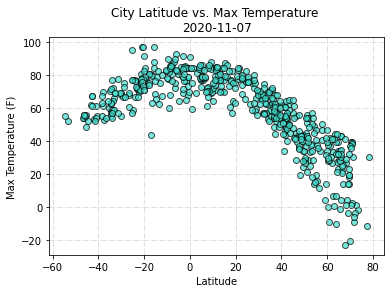

In [7]:
# Get the info of latitude and max temperature, then plot scatter chart
latitude = city_data_df["Lat"]
max_temperature = city_data_df["Max Temp"]
plt.scatter(latitude, max_temperature, edgecolors='black', facecolors="turquoise", alpha=0.7)

# Plot design elements 
plt.title(f"City Latitude vs. Max Temperature \n{date.today()}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-.', alpha = 0.5)
plt.savefig("Images/Fig_1.png", facecolor='w')
print("Image was saved in /Images folder")
plt.show()

#### Latitude vs. Humidity Plot

Image was saved in /Images folder


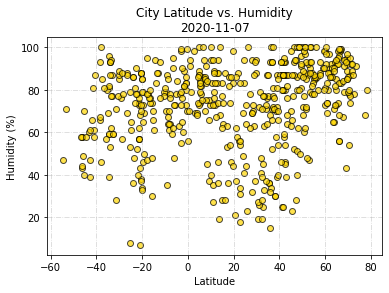

In [8]:
# Get humidity info from dataframe, then plot scatter chart
humid = city_data_df["Humidity"]
plt.scatter(latitude, humid, edgecolors='black', facecolors="gold", alpha=0.7)

# Plot design elements 
plt.title(f"City Latitude vs. Humidity\n{date.today()}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-.', alpha = 0.5)
plt.savefig("Images/Fig_2.png", facecolor='w')
print("Image was saved in /Images folder")
plt.show()

#### Latitude vs. Cloudiness Plot

Image was saved in /Images folder


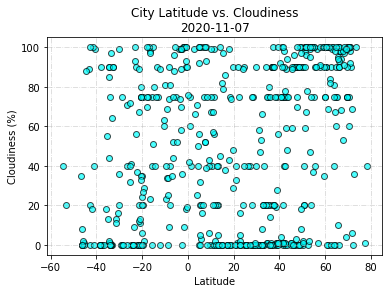

In [9]:
# Get cloudiness info from dataframe, then plot scatter chart
cloud = city_data_df["Cloudiness"]
plt.scatter(latitude, cloud, edgecolors='black', facecolors="aqua", alpha=0.7)

# Plot design elements 
plt.title(f"City Latitude vs. Cloudiness\n{date.today()}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-.', alpha = 0.5)
plt.savefig("Images/Fig_3.png", facecolor='w')
print("Image was saved in /Images folder")
plt.show()

#### Latitude vs. Wind Speed Plot

Image was saved in /Images folder


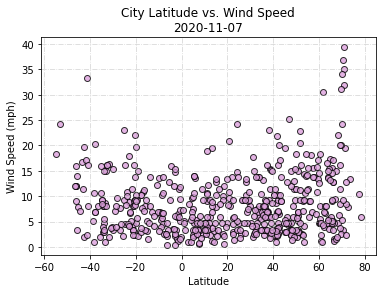

In [10]:
# Get wind speed info from dataframe, then plot scatter chart
wind_s = city_data_df["Wind Speed"]
plt.scatter(latitude, wind_s, edgecolors='black', facecolors="plum", alpha=0.8)

# Plot design elements 
plt.title(f"City Latitude vs. Wind Speed\n{date.today()}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(linestyle='-.', alpha = 0.5)
plt.savefig("Images/Fig_4.png", facecolor='w')
print("Image was saved in /Images folder")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [11]:
# ------------- Define a function for linear regression plot -------------
def plotting_linear(x, y, fig_col, fig_title, fig_xl, fig_yl, fig_name):
    
    # Linear regression model and its equation
    slope, intercept, rvalue, _, _ = linregress(x, y)
    eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    print(f"The correlation coefficient is: {round(rvalue, 5)}")

    # Build regression line (y = mx + b)
    regress_line = slope * x + intercept

    # Create scatter plotting, annotate the equation, some design elements
    plt.scatter(x, y, alpha = 0.7, edgecolors = "grey", facecolors = fig_col)
    plt.title(fig_title)
    plt.xlabel(fig_xl)
    plt.ylabel(fig_yl)
    plt.xlim(min(x) - 10, max(x) + 10)
    plt.ylim(min(y) - 10, max(y) + 10)
    plt.plot(x, regress_line, "r--")
    plt.annotate(eq, (min(x), min(y)-8), fontsize=13, color='r', alpha = 0.8)
    plt.grid(linestyle='-.', alpha = 0.4)
    plt.savefig("Images/" + fig_name, facecolor='w')
    print("Linear Regression image was saved in /Images folder")
    plt.show()

# ------------- End of the definition of plotting function -------------

# Get all required cities rows and make a new df for north/south hemisphere
north_df = city_data_df.loc[city_data_df["Lat"] > 0]
south_df = city_data_df.loc[city_data_df["Lat"] < 0]

The correlation coefficient is: -0.87271
Linear Regression image was saved in /Images folder


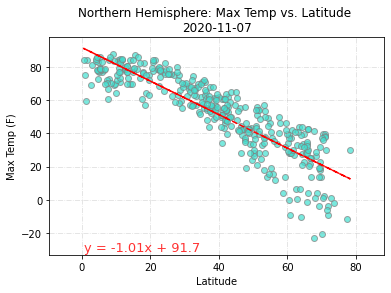

In [12]:
# Input plotting parameters to call the function
x_n_lat = north_df["Lat"]
y_n_maxtemp = north_df["Max Temp"]
fig_col = "turquoise"
fig_title = f"Northern Hemisphere: Max Temp vs. Latitude \n{date.today()}"
fig_xl = "Latitude"
fig_yl = "Max Temp (F)"
fig_name = "Linear_1.png"

# Plot the chart with the function above
plotting_linear(x_n_lat, y_n_maxtemp, fig_col, fig_title, fig_xl, fig_yl, fig_name)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is: 0.69817
Linear Regression image was saved in /Images folder


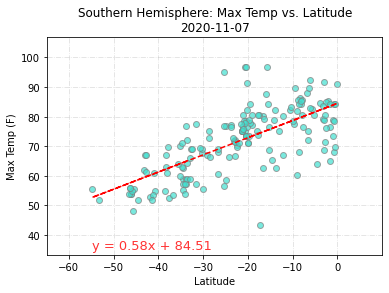

In [13]:
# Input plotting parameters to call the function
x_s_lat = south_df["Lat"]
y_s_maxtemp = south_df["Max Temp"]
fig_col = "turquoise"
fig_title = f"Southern Hemisphere: Max Temp vs. Latitude\n{date.today()}"
fig_xl = "Latitude"
fig_yl = "Max Temp (F)"
fig_name = "Linear_2.png"

# Plot the chart with the function above
plotting_linear(x_s_lat, y_s_maxtemp, fig_col, fig_title, fig_xl, fig_yl, fig_name)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is: 0.24767
Linear Regression image was saved in /Images folder


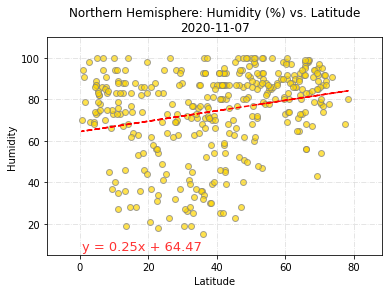

In [14]:
# Input plotting parameters to call the function
x_n_lat = north_df["Lat"]
y_n_humidity = north_df["Humidity"]
fig_col = "gold"
fig_title = f"Northern Hemisphere: Humidity (%) vs. Latitude\n{date.today()}"
fig_xl = "Latitude"
fig_yl = "Humidity"
fig_name = "Linear_3.png"

# Plot the chart with the function above
plotting_linear(x_n_lat, y_n_humidity, fig_col, fig_title, fig_xl, fig_yl, fig_name)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is: 0.20948
Linear Regression image was saved in /Images folder


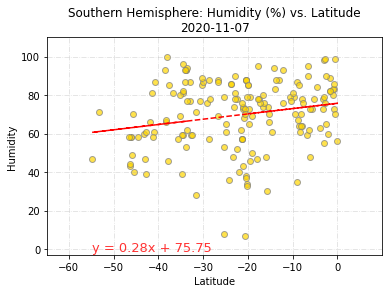

In [15]:
# Input plotting parameters to call the function
x_s_lat = south_df["Lat"]
y_s_humidity = south_df["Humidity"]
fig_col = "gold"
fig_title = f"Southern Hemisphere: Humidity (%) vs. Latitude\n{date.today()}"
fig_xl = "Latitude"
fig_yl = "Humidity"
fig_name = "Linear_4.png"

# Plot the chart with the function above
plotting_linear(x_s_lat, y_s_humidity, fig_col, fig_title, fig_xl, fig_yl, fig_name)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is: 0.33081
Linear Regression image was saved in /Images folder


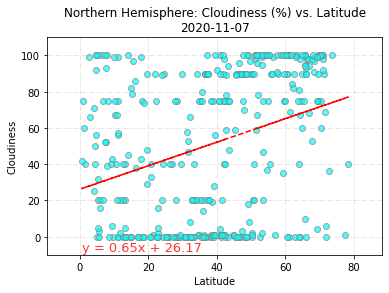

In [16]:
# Input plotting parameters to call the function
x_n_lat = north_df["Lat"]
y_n_cloud = north_df["Cloudiness"]
fig_col = "aqua"
fig_title = f"Northern Hemisphere: Cloudiness (%) vs. Latitude\n{date.today()}"
fig_xl = "Latitude"
fig_yl = "Cloudiness"
fig_name = "Linear_5.png"

# Plot the chart with the function above
plotting_linear(x_n_lat, y_n_cloud, fig_col, fig_title, fig_xl, fig_yl, fig_name)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is: 0.36305
Linear Regression image was saved in /Images folder


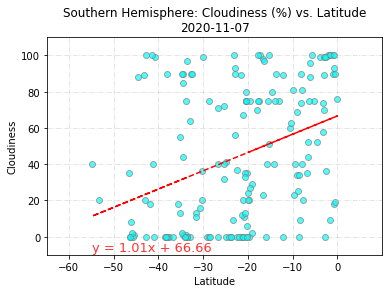

In [17]:
# Input plotting parameters to call the function
x_s_lat = south_df["Lat"]
y_s_cloud = south_df["Cloudiness"]
fig_col = "aqua"
fig_title = f"Southern Hemisphere: Cloudiness (%) vs. Latitude\n{date.today()}"
fig_xl = "Latitude"
fig_yl = "Cloudiness"
fig_name = "Linear_6.png"

# Plot the chart with the function above
plotting_linear(x_s_lat, y_s_cloud, fig_col, fig_title, fig_xl, fig_yl, fig_name)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is: 0.28908
Linear Regression image was saved in /Images folder


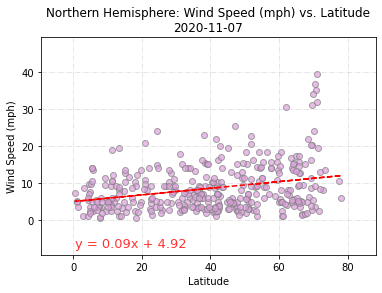

In [18]:
# Input plotting parameters to call the function
x_n_lat = north_df["Lat"]
y_n_wind = north_df["Wind Speed"]
fig_col = "plum"
fig_title = f"Northern Hemisphere: Wind Speed (mph) vs. Latitude\n{date.today()}"
fig_xl = "Latitude"
fig_yl = "Wind Speed (mph)"
fig_name = "Linear_7.png"

# Plot the chart with the function above
plotting_linear(x_n_lat, y_n_wind, fig_col, fig_title, fig_xl, fig_yl, fig_name)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is: -0.30875
Linear Regression image was saved in /Images folder


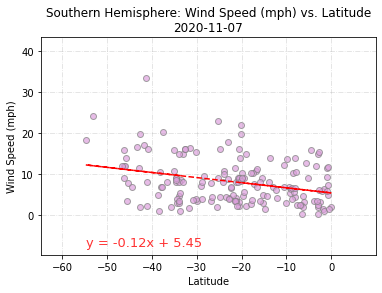

In [19]:
# Input plotting parameters to call the function
x_s_lat = south_df["Lat"]
y_s_wind = south_df["Wind Speed"]
fig_col = "plum"
fig_title = f"Southern Hemisphere: Wind Speed (mph) vs. Latitude\n{date.today()}"
fig_xl = "Latitude"
fig_yl = "Wind Speed (mph)"
fig_name = "Linear_8.png"

# Plot the chart with the function above
plotting_linear(x_s_lat, y_s_wind, fig_col, fig_title, fig_xl, fig_yl, fig_name)

## Misc: Extra City Plotting
---
To better understand the model we built from random longtitudes and latitudes, a scatter plotting over a world map was built, showing the locations of generated cities.

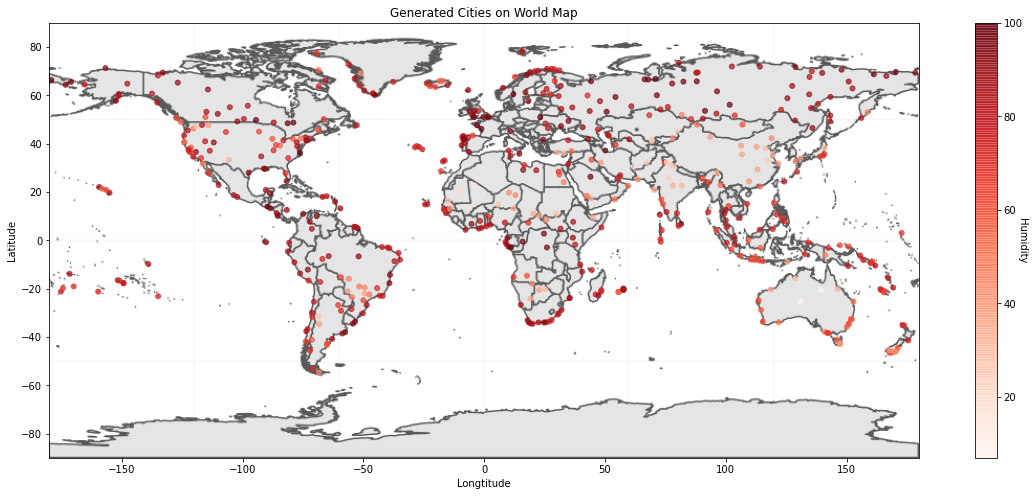

In [20]:
# Import a world map image as the background
ruh_m = plt.imread("Resources/map.png")
BBox = (-180, 180, -90, 90)

# Plot scatter points from longtitude and latitude
fig, ax = plt.subplots(figsize = (20, 8))
sm = ax.scatter(city_data_df["Lng"], city_data_df["Lat"], zorder=1, alpha= 0.7, c = city_data_df["Humidity"], cmap = "Reds", s = 25)

# Set the x, y limits same as the world map
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.set_title("Generated Cities on World Map")
ax.set_xlabel("Longtitude")
ax.set_ylabel("Latitude")
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')
cbar = fig.colorbar(sm, ax = ax)
cbar.set_label("Humidity", rotation=270)
plt.show()

In [21]:
# Check the correlation between columns
corr_matrix = city_data_df.corr()
corr_matrix.style.highlight_min(subset=["Lat", "Max Temp"])

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
Cloudiness,1.000000,-0.026718,0.372296,0.251591,-0.027698,-0.247486,0.146735
Date,-0.026718,1.000000,-0.060734,0.059652,0.090298,0.155064,-0.121439
Humidity,0.372296,-0.060734,1.000000,0.219801,-0.225717,-0.316707,-0.007966
Lat,0.251591,0.059652,0.219801,1.000000,-0.119164,-0.674681,0.106073
Lng,-0.027698,0.090298,-0.225717,-0.119164,1.000000,0.069695,-0.010488
Max Temp,-0.247486,0.155064,-0.316707,-0.674681,0.069695,1.000000,-0.120703
Wind Speed,0.146735,-0.121439,-0.007966,0.106073,-0.010488,-0.120703,1.000000
